In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
FB_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/FB_predictions_RFC.csv", index_col=0)


In [3]:
FB_predictions.head()

,Date,Predictions
0,2019-07-31,1
1,2019-06-28,0
2,2019-05-31,1
3,2019-04-30,1
4,2019-03-29,0


In [4]:
FB_predictions.Date = pd.to_datetime(FB_predictions.Date, format="%Y-%m-%d")

In [5]:
FB_predictions['Predictions'] = FB_predictions['Predictions'].shift(-1)


In [6]:
FB_predictions = FB_predictions.dropna()


In [7]:
FB_predictions = FB_predictions[::-1]

In [8]:
FB_predictions.head(10)

,Date,Predictions
83,2012-08-31,0.0
82,2012-09-28,1.0
81,2012-10-31,1.0
80,2012-11-30,1.0
79,2012-12-31,1.0
78,2013-01-31,0.0
77,2013-02-28,0.0
76,2013-03-28,0.0
75,2013-04-30,1.0
74,2013-05-31,0.0


In [9]:
FB_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/FB/FB_monthly.csv", index_col =0)

In [10]:
FB_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
FB_predictions = FB_predictions.set_index("Date")

In [12]:
FB_monthly.tail()

,Open,High,Low,Close,Volume
2012-10-31,22.080,24.25,18.80,21.110,1100938300
2012-09-28,18.080,23.37,17.55,21.660,1058643700
2012-08-31,21.500,22.45,18.03,18.058,1151944900
2012-07-31,31.250,32.88,21.61,21.710,520189700
2012-06-29,28.892,33.45,25.52,31.095,667910500


In [13]:
FB_final_df = pd.merge(FB_predictions, FB_monthly, right_index=True, left_index=True)

In [14]:
FB_final_df.index = pd.to_datetime(FB_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

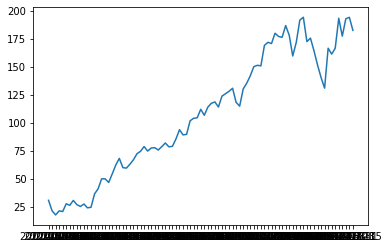

In [16]:
plt.plot(FB_monthly.index[::-1], FB_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] and (position.is_short != True) == 0.0 :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(FB_final_df, Binary_Classification_1d, cash=10000, commission=.01)
bt.run()



Start                          2012-08-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        2525 days 00:00:00
Exposure [%]                                     0
Equity Final [$]                           86241.7
Equity Peak [$]                            86281.6
Return [%]                                 762.417
Buy & Hold Return [%]                       975.59
Max. Drawdown [%]                         -32.5391
Avg. Drawdown [%]                         -6.93561
Max. Drawdown Duration           182 days 00:00:00
Avg. Drawdown Duration           100 days 00:00:00
# Trades                                         0
Win Rate [%]                                   NaN
Best Trade [%]                                 NaN
Worst Trade [%]                                NaN
Avg. Trade [%]                                 NaN
Max. Trade Duration                            NaT
Avg. Trade Duration                            NaT
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/FB_RFC_Equity.csv")

In [25]:
df

,Equity
2012-09-28,10000.000000
2012-10-31,9373.223927
2012-11-30,12432.509236
2012-12-31,11819.764138
2013-01-31,13756.127451
2013-02-28,12099.495595
2013-03-28,11357.985223
2013-04-30,12329.941034
2013-05-31,10810.954817
2013-06-28,11047.172492
